# Finding patterns in Data

Consider the following data set

In [1]:
r = np.random.RandomState(123)

w0 = 2
w1 = 0.5

N = 20

x = np.linspace(0,5,N)
y = w1*x + w0 + r.normal(0,0.3,N)

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,0.000000,1.674311
1,0.263158,2.430783
2,0.526316,2.348051
3,0.789474,1.942848
4,1.052632,2.352736
...,...,...
15,3.947368,3.843379
16,4.210526,4.767042
17,4.473684,4.892878
18,4.736842,4.669637


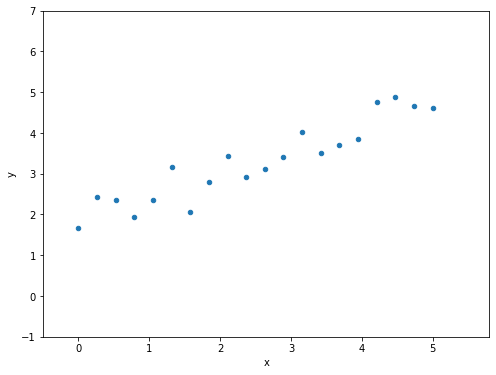

In [2]:
df.plot(x='x', y='y', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])

## The *simplest* model: a line

Now consider the problem of finding the *best linear model*, in order to make *predictions* $\hat y$ from some new data, $x$ 

$\hat y = w_0 + w_1 x~~~~$ 

(This is the same as $y = m x + b$ )

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [37]:
#%matplotlib inline
setPLTdisplay(10,7)

xpts = np.linspace(0,5)

def linmodel(w0, w1):
    df.plot(x='x', y='y', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])
    plt.plot(x, w1*x + w0, '-r', label=r'$\hat y = w_1 x + w_0$')
    plt.xlabel('x data (independent)')
    plt.ylabel('y data (dependent)')
    plt.title('')
    plt.legend(fontsize=16)
    plt.show()
    
w = interactive(linmodel, w0=1.0, w1=1.5)
display(w)

interactive(children=(FloatSlider(value=1.0, description='w0', max=3.0, min=-1.0), FloatSlider(value=1.5, desc…

This format, 

$\hat y = w_0 + w_1 x~~~~$ 

is clearly just $\hat y = mx + b$, where $w_0 = b$ and $w_1 = m$.

---

## 3-D example



This format generalizes easily to *multivariate linear regression*, of the form:

$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d$

Here we have $d$ features:

$(x_1, x_2, x_3,... ,x_d)$

and our *linear model* is defined by the $d+1$ coefficients, ${\bf w} = (w_0,...,w_d)$.

$~$

We will also later write this in the form:

$\hat y = {\bf w}\cdot {\bf \mathbb{x}}$

Here, 

$\mathbb{x} = (1, {\bf x}) = (1, x_{1}, x_{2},..., x_{d})$

is a $d+1$ dimensional vector made of $1$ as the first component, and the $d$ dimensional data vector of features ${\bf x}_i$, from row $i$.


In [55]:
np.random.seed(777)
xdata = np.random.randn(50) #np.linspace(0,10,50)
ydata = np.random.randn(50) #np.linspace(0,10,50)
zdata = 2.0*xdata - ydata + 1.0*np.random.randn(50)

**The 3-D Model**

$y = w_0 + w_1 x_1 + w_2 x_2 $

or:

$y = \bf w\cdot {\bf \mathbb{x}}$

where:

$\qquad{\bf w} = (w_0, w_1, w_2)$

$\qquad{\bf \mathbb{x}} = (1, x_1, x_2)$

In [56]:
df3d = pd.DataFrame({'x_1':xdata, 'x_2':ydata, 'y':zdata})
df3d

,x_1,x_2,y
0,-0.468209,0.757684,-1.920167
1,-0.822825,-0.152086,-2.372194
2,-0.065380,-0.271279,-0.831086
3,-0.713362,-0.599840,-0.772719
4,0.906351,-2.026904,3.900697
...,...,...,...
45,-0.727618,-2.217795,1.853577
46,-1.403946,-0.906292,-1.780421
47,-1.240611,-1.462125,-1.553991
48,-0.443482,-0.677565,1.253578


<IPython.core.display.Javascript object>


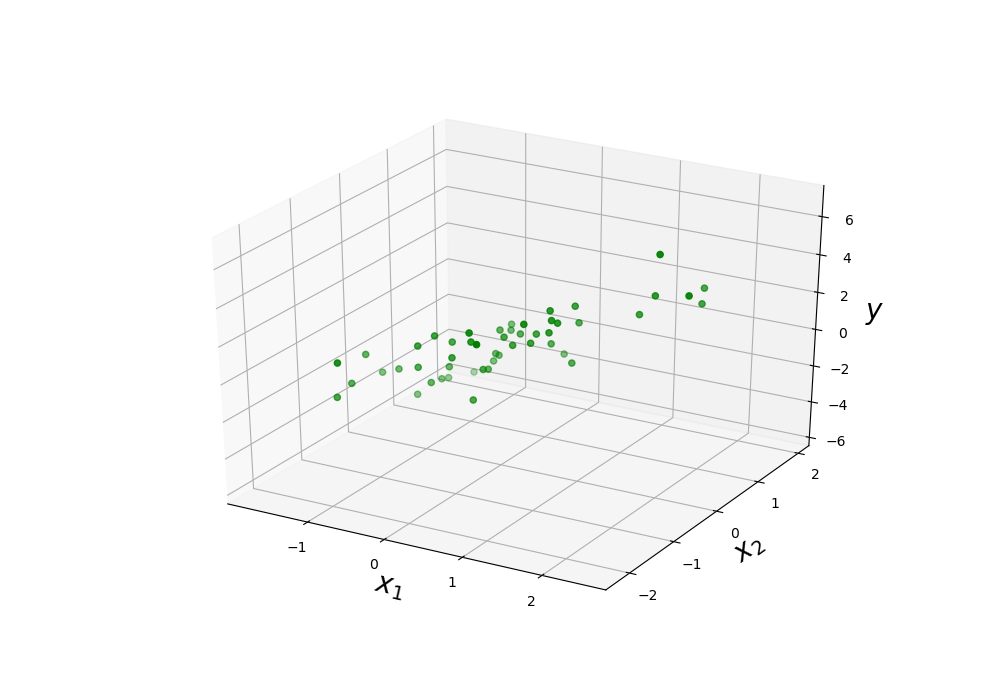

In [57]:
from mpl_toolkits import mplot3d
%matplotlib notebook

setPLTdisplay(10,7)

ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c="g")
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$y$', fontsize=20);

In [59]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df3d[['x_1', 'x_2']], df3d['y'])
w = [reg.intercept_, reg.coef_[0], reg.coef_[1]]
print('w_0 =', w[0], '  w_1 =', w[1], '   w_2 =', w[2])

w_0 = 0.1396494121365427   w_1 = 2.110831056909076    w_2 = -1.1923026791554021


<IPython.core.display.Javascript object>


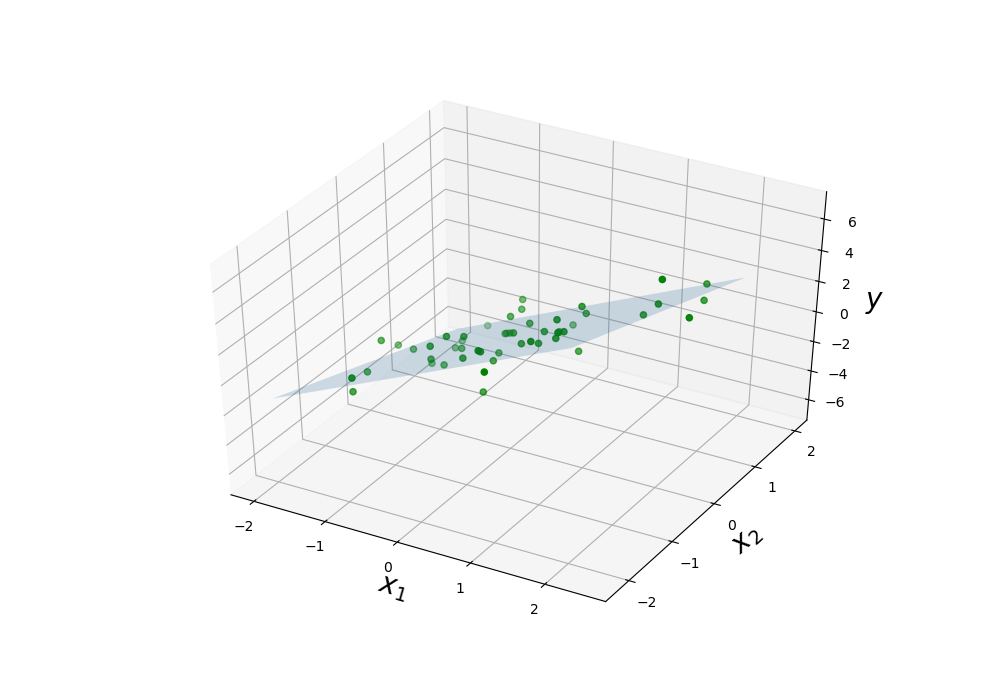

In [60]:
%matplotlib notebook

ax = plt.axes(projection='3d')

# a, b span plane
xlin = np.linspace(-2, 2, 10)
ylin = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(xlin, ylin)

# f(x,y) plane function
# See: http://math.stackexchange.com/questions/562123/equation-of-plane-containing-two-vectors
def f(x,y):
    return w[0] + w[1]*X + w[2]*Y

Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)


ax.scatter3D(xdata, ydata, zdata, c="g")
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$y$', fontsize=20);

---